In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks


In [10]:
#load the minist dataset

(train_images,train_labels),(test_images,test_labels)=tf.keras.datasets.fashion_mnist.load_data()


In [11]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

In [12]:
train_labels[0]

9

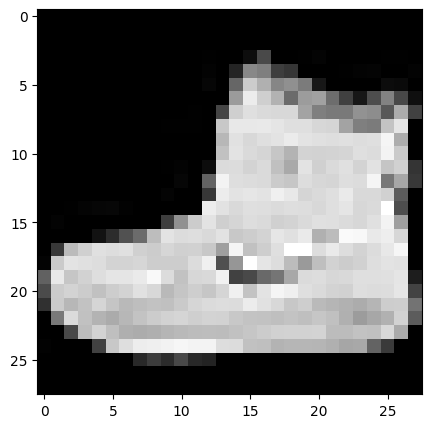

In [13]:
plt.figure(figsize=(8,5))
plt.imshow(train_images[0],cmap='gray')

In [14]:
train_labels[0]

9

In [15]:
#normalization------between 0-1

train_images_scaled=train_images.astype('float32')/255
test_images_scaled=test_images.astype('float32')/255

In [16]:
train_images_scaled[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [17]:
# reshape to 1 d--------

train_images=train_images_scaled.reshape(-1,28,28,1)
test_images=test_images_scaled.reshape(-1,28,28,1)

In [18]:
#one hot encoding-------

train_labels=tf.keras.utils.to_categorical(train_labels)
test_labels=tf.keras.utils.to_categorical(test_labels)

In [19]:
#data augumentation----
data_augumentation=tf.keras.Sequential([
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

In [20]:

#creating our model-----

def create_model():
    model=models.Sequential([
        layers.Input(shape=(28,28,1)),
        data_augumentation,

        #layer_1 dense
        layers.Conv2D(32,(3,3),activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),

        #layer2
        layers.Conv2D(64,(3,3),activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),

        #layer3
        layers.Conv2D(64,(3,3),activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),

        #flatten
        layers.Flatten(input_shape=(28,28,1)),

        #ANN
        layers.Dense(128,activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10,activation='softmax')
    ])
    return model

In [21]:
model=create_model()
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#earlys topping ---callbacks and ----ReduceLR
early_stopping=callbacks.EarlyStopping(patience=5,restore_best_weights=True)
reducelr=callbacks.ReduceLROnPlateau(factor=0.2,patience=3)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
history=model.fit(train_images,train_labels,epochs=10,validation_split=0.1,callbacks=[early_stopping, reducelr])

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.6546 - loss: 0.9761 - val_accuracy: 0.7790 - val_loss: 0.5818 - learning_rate: 0.0010
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 78s 44ms/step - accuracy: 0.7879 - loss: 0.5782 - val_accuracy: 0.8158 - val_loss: 0.4833 - learning_rate: 0.0010
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 44ms/step - accuracy: 0.8106 - loss: 0.5203 - val_accuracy: 0.7753 - val_loss: 0.5957 - learning_rate: 0.0010
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 74s 44ms/step - accuracy: 0.8208 - loss: 0.4902 - val_accuracy: 0.7717 - val_loss: 0.8391 - learning_rate: 0.0010
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 45ms/step - accuracy: 0.8332 - loss: 0.4636 - val_accuracy: 0.8445 - val_loss: 0.4174 - learning_rate: 0.0010
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.8389 - loss: 0.4512 - val_accuracy: 0.8123 - val_loss: 0.5183 - learning_rate: 0.0010
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accura

In [23]:
loss,accuracy=model.evaluate(test_images,test_labels,verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8584 - loss: 0.4096


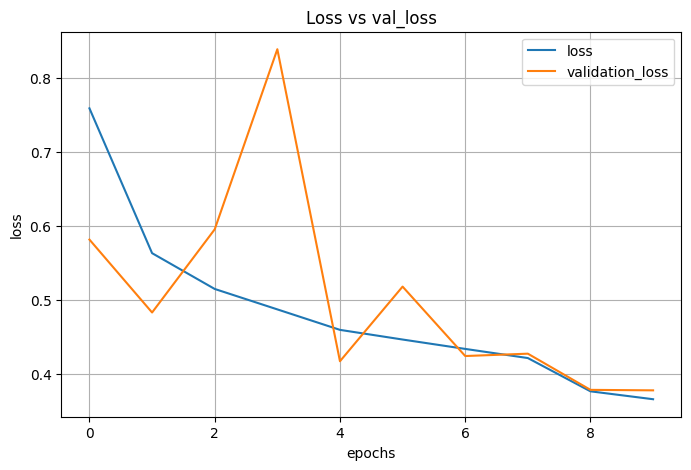

In [24]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'],label="loss")
plt.plot(history.history['val_loss'],label="validation_loss")
plt.title("Loss vs val_loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.grid(True)

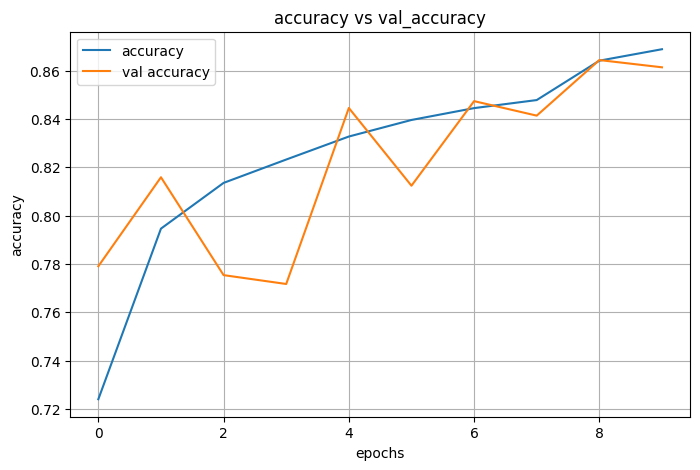

In [25]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'],label="accuracy")
plt.plot(history.history['val_accuracy'],label="val accuracy")
plt.title("accuracy vs val_accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.grid(True)

In [26]:
model.save("fashion_mnist_cnn.keras")
print('suucessfully saved!')

suucessfully saved!
